In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [76]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [77]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# EDA

In [78]:
df['Churn'].unique()


array(['No', 'Yes'], dtype=object)

In [79]:
df['Churn'] = df['Churn'].map({'No':0, 'Yes':1})


In [80]:
df['Churn'].unique()
df['Churn'].value_counts()


Churn
0    5174
1    1869
Name: count, dtype: int64

In [81]:
df.shape

(7043, 21)

In [82]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [84]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,0.265370
std,0.368612,24.559481,30.090047,0.441561
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,0.000000
50%,0.000000,29.000000,70.350000,0.000000
75%,0.000000,55.000000,89.850000,1.000000
max,1.000000,72.000000,118.750000,1.000000


In [85]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [86]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [87]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


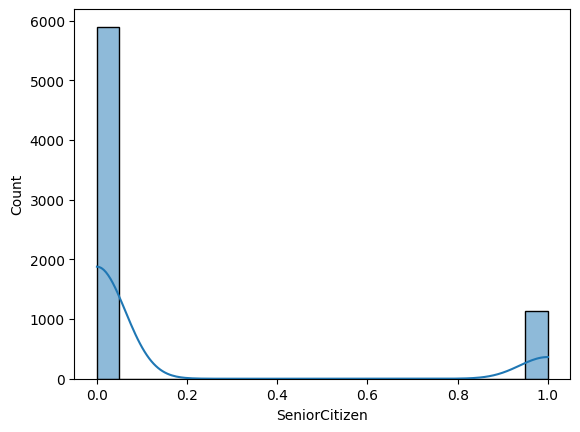

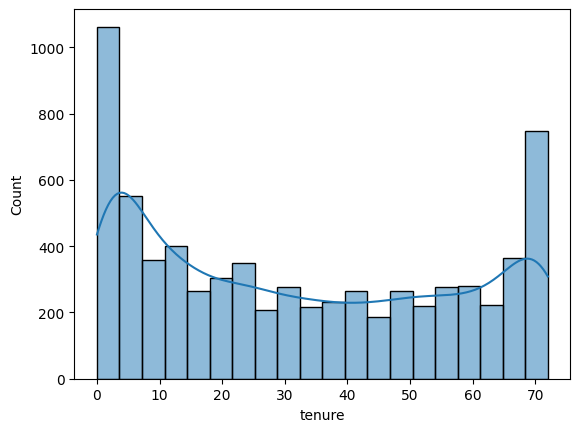

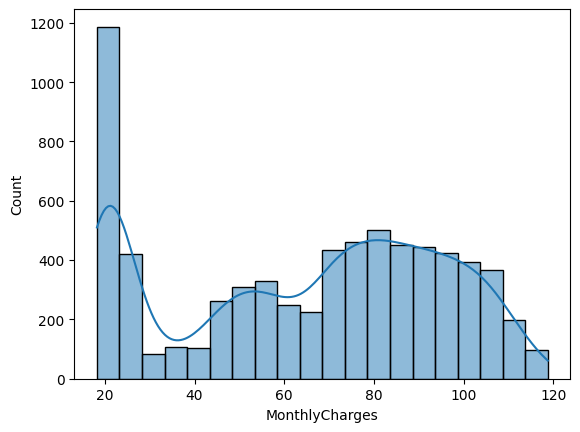

In [88]:
numeric_columns = ['SeniorCitizen','tenure','MonthlyCharges']
for col in numeric_columns:
    plt.Figure(figsize = (6,4))
    sns.histplot(df[col],kde = True , bins = 20)
    plt.show()

<Axes: xlabel='gender', ylabel='count'>

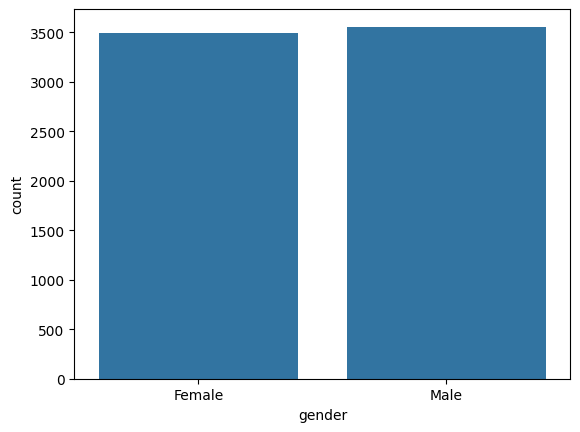

In [89]:
sns.countplot(x = df ['gender'])

<Axes: xlabel='SeniorCitizen', ylabel='count'>

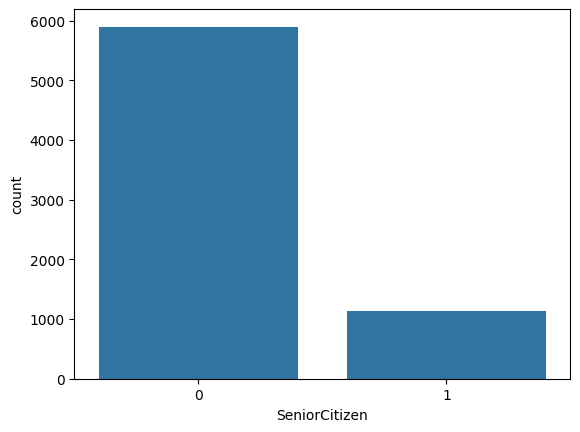

In [90]:
sns.countplot(x = df ['SeniorCitizen'])

<Axes: xlabel='Partner', ylabel='count'>

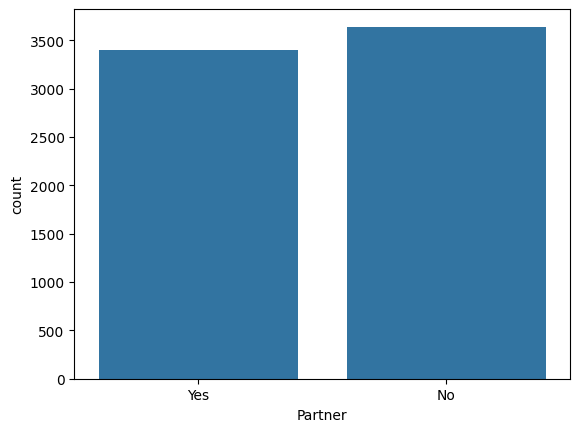

In [91]:
sns.countplot(x = df ['Partner'])

<Axes: xlabel='Dependents', ylabel='count'>

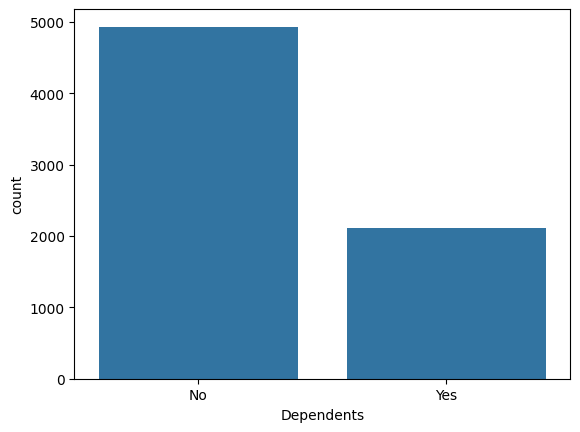

In [92]:
sns.countplot(x = df ['Dependents'])

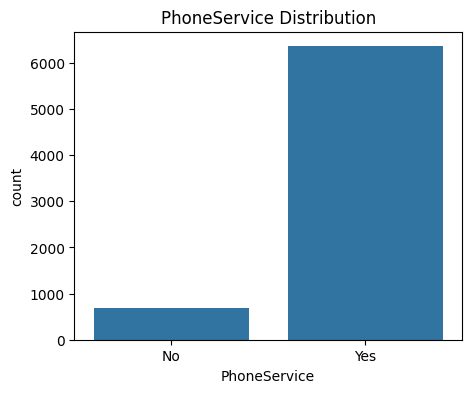

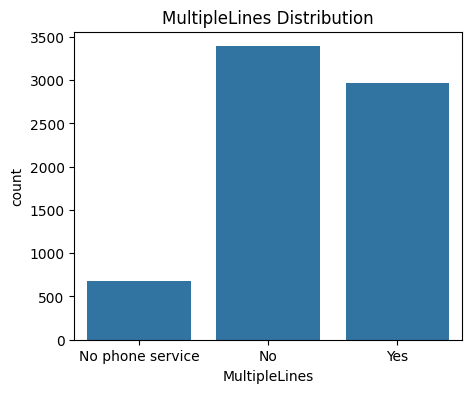

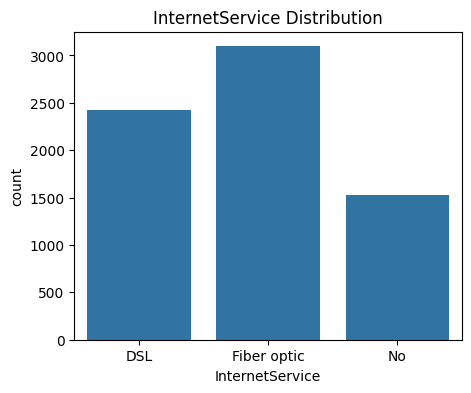

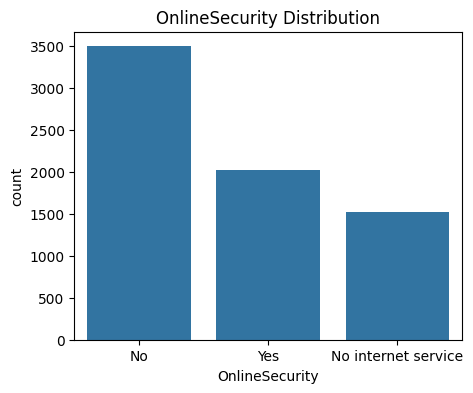

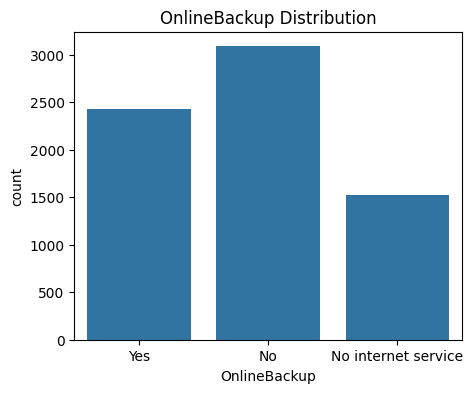

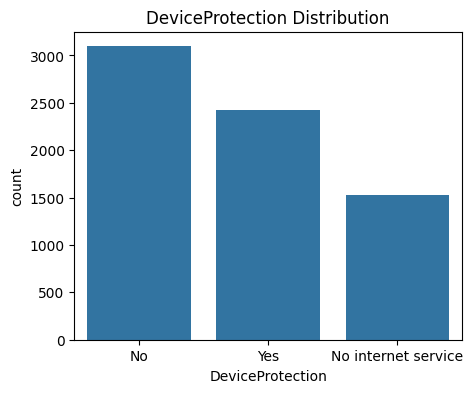

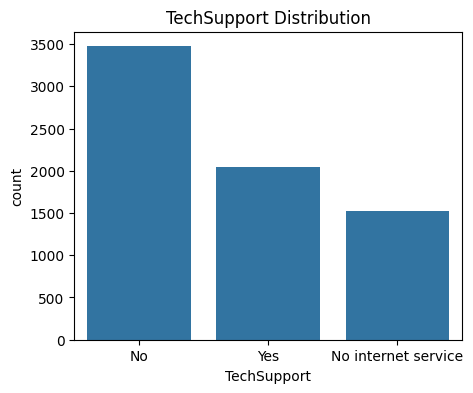

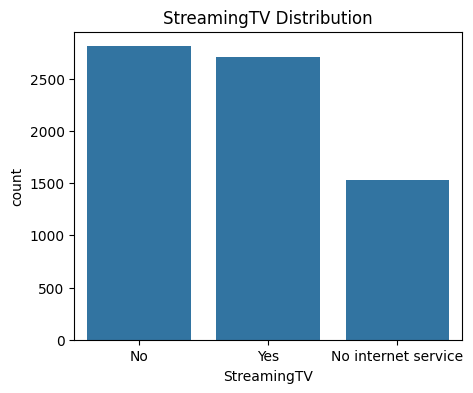

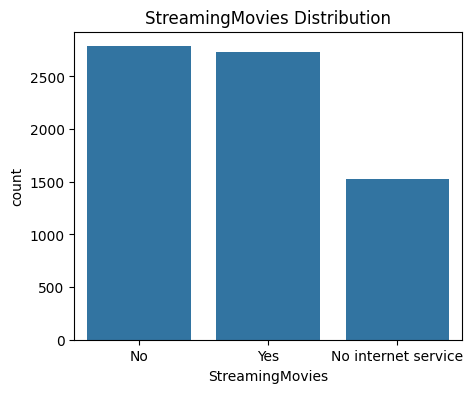

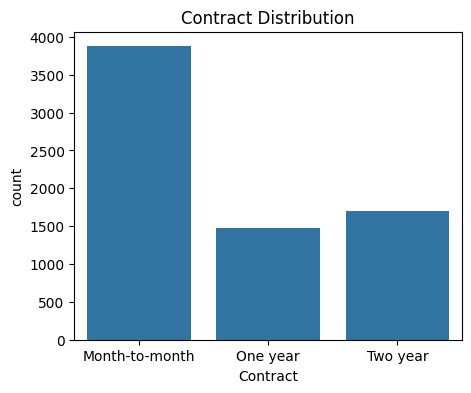

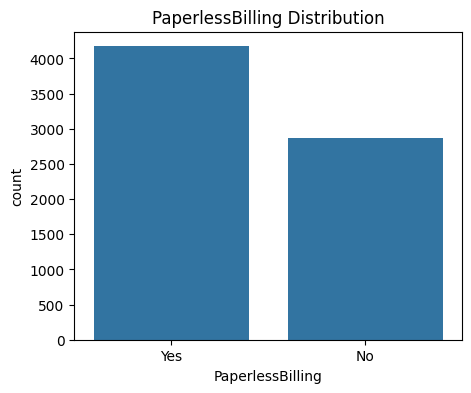

In [93]:
cols = ['PhoneService', 'MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling']

for col in cols:
    plt.figure(figsize=(5,4))
    sns.countplot(x=col, data=df)
    plt.title(f"{col} Distribution")
    plt.show()


No need of Doing much boxplot analysis as most of the features are properly balanced

<Axes: >

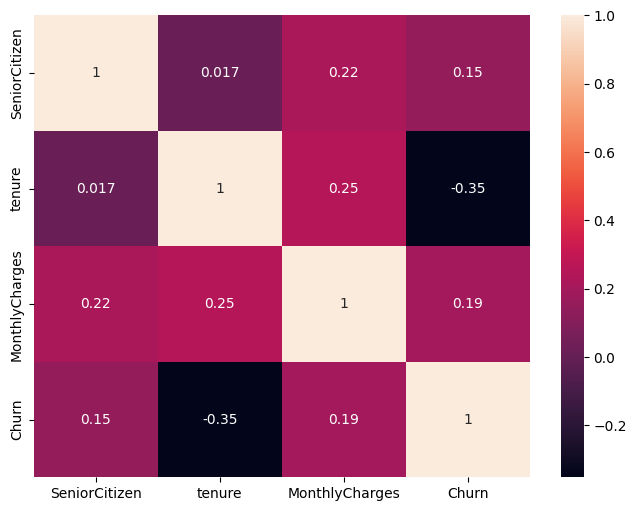

In [94]:
plt.figure (figsize = (8,6) )
sns.heatmap(df.corr(numeric_only=True),annot=True)

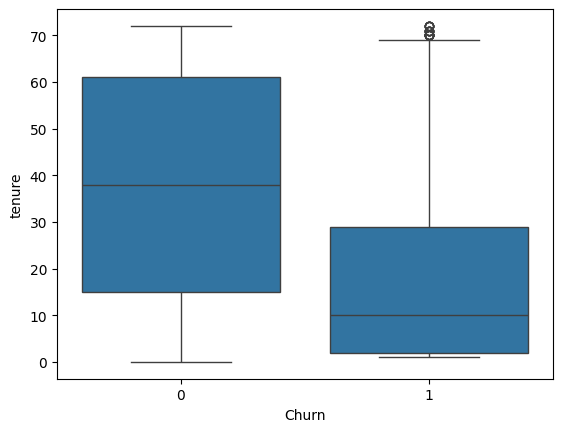

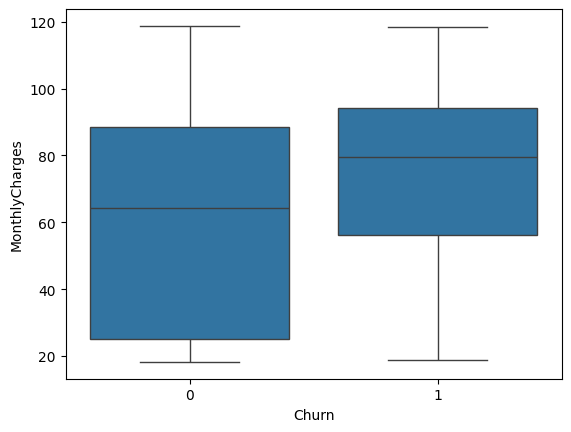

In [95]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.show()

sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.show()


In [96]:
df['Churn'].value_counts(normalize=True)


Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

# Data Cleaming and Pre - Processing

In [97]:
df_cleaned = df.copy()
df_cleaned.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [98]:
df_cleaned.shape

(7043, 21)

In [99]:
df_cleaned.drop_duplicates(inplace=True)

In [100]:
df_cleaned.shape

(7043, 21)

In [101]:
df_cleaned.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [102]:
df_cleaned.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [103]:
df_cleaned ['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [104]:
df_cleaned['gender'] = df_cleaned['gender'].map({"Male" : 0, "Female" : 1})

In [105]:
df_cleaned.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,0,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,1,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [106]:
df_cleaned ['Partner'].value_counts()

Partner
No     3641
Yes    3402
Name: count, dtype: int64

In [107]:
df_cleaned['Partner'] = df_cleaned['Partner'].map({"No" : 0, "Yes" : 1})

In [108]:
df_cleaned['Dependents'] = df_cleaned['Dependents'].map({"No" : 0, "Yes" : 1})

In [109]:
df_cleaned ['PhoneService'].value_counts()     # will do label encoding

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

In [110]:
df_cleaned ['MultipleLines'].value_counts()    #will do one hot encoding

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [111]:
df_cleaned ['InternetService'].value_counts()    #will do one hot encoding 

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [112]:
df_cleaned['PhoneService'] = df_cleaned['PhoneService'].map({"No" : 0, "Yes" : 1})

In [113]:
df_cleaned.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,0,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [114]:
df_cleaned ['PaymentMethod'].value_counts()  #one hot encoading

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [115]:
df_cleaned['PaperlessBilling'] = df_cleaned['PaperlessBilling'].map({"No" : 0, "Yes" : 1})

Applying One Hot En-Coading

In [116]:
df.drop("customerID", axis=1, inplace=True)


In [117]:
# Convert to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows where conversion failed
df = df.dropna()


In [118]:
df = pd.get_dummies(df, drop_first=True)


In [119]:
df_cleaned.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,0,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


# Feature Scaling and Train-Test Split

In [120]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [121]:
print(X_train.dtypes)


SeniorCitizen                              int64
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
gender_Male                                 bool
Partner_Yes                                 bool
Dependents_Yes                              bool
PhoneService_Yes                            bool
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No internet service             bool
TechSupport_Yes                             bool
StreamingTV_No inter

In [122]:
X_test.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2481,1,61,25.00,1501.75,True,True,False,True,False,True,...,True,False,True,False,False,True,False,False,False,False
6784,0,19,24.70,465.85,False,False,False,True,False,True,...,True,False,True,False,False,False,False,False,False,False
6125,0,13,102.25,1359.00,True,True,False,True,False,True,...,False,True,False,True,False,False,True,True,False,False
3052,0,37,55.05,2030.75,True,True,False,True,False,True,...,False,False,False,False,False,False,True,False,False,True
4099,0,6,29.45,161.45,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [123]:
X_train.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6030,0,43,49.05,2076.20,False,False,False,False,True,False,...,False,True,False,True,False,False,True,False,False,False
3410,0,3,53.40,188.70,True,False,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
5483,0,55,77.75,4458.15,False,True,False,True,False,True,...,False,False,False,False,False,False,True,False,True,False
5524,0,45,54.65,2553.70,True,True,True,True,False,False,...,False,False,False,False,False,True,False,False,False,False
6337,0,55,100.90,5448.60,False,True,True,True,False,True,...,False,True,False,True,True,False,False,False,False,True


In [124]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']


# Feature Scaling

In [125]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [126]:
df_cleaned.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,0,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [127]:
X_train.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6030,0,0.434674,-0.518620,-0.087908,False,False,False,False,True,False,...,False,True,False,True,False,False,True,False,False,False
3410,0,-1.195652,-0.374443,-0.921285,True,False,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
5483,0,0.923772,0.432616,0.963781,False,True,False,True,False,True,...,False,False,False,False,False,False,True,False,True,False
5524,0,0.516190,-0.333013,0.122920,True,True,True,True,False,False,...,False,False,False,False,False,True,False,False,False,False
6337,0,0.923772,1.199902,1.401088,False,True,True,True,False,True,...,False,True,False,True,True,False,False,False,False,True


In [128]:
X_test.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2481,1,1.168321,-1.315736,-0.341541,True,True,False,True,False,True,...,True,False,True,False,False,True,False,False,False,False
6784,0,-0.543522,-1.325680,-0.798916,False,False,False,True,False,True,...,True,False,True,False,False,False,False,False,False,False
6125,0,-0.788071,1.244647,-0.404569,True,True,False,True,False,True,...,False,True,False,True,False,False,True,True,False,False
3052,0,0.190125,-0.319756,-0.107975,True,True,False,True,False,True,...,False,False,False,False,False,False,True,False,False,True
4099,0,-1.073378,-1.168245,-0.933316,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


# Baseline Model Comparison

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score


In [130]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB()
}


In [131]:
results = []

for name, model in models.items():
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    
    results.append([name, accuracy, roc])
    
    print(f"\n{name}")
    print("Accuracy:", accuracy)
    print("ROC-AUC:", roc)
    print(classification_report(y_test, y_pred))



Logistic Regression
Accuracy: 0.7867803837953091
ROC-AUC: 0.6995692935274965
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407


Decision Tree
Accuracy: 0.7256574271499645
ROC-AUC: 0.6622073189039763
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1033
           1       0.49      0.53      0.51       374

    accuracy                           0.73      1407
   macro avg       0.65      0.66      0.66      1407
weighted avg       0.73      0.73      0.73      1407




Random Forest
Accuracy: 0.7931769722814499
ROC-AUC: 0.6928382107045054
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.65      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407


KNN
Accuracy: 0.7491115849324804
ROC-AUC: 0.6747687282252512
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1033
           1       0.53      0.52      0.52       374

    accuracy                           0.75      1407
   macro avg       0.68      0.67      0.68      1407
weighted avg       0.75      0.75      0.75      1407


SVM
Accuracy: 0.7910447761194029
ROC-AUC: 0.6888275155173396
              precision    recall  f1-score   support

           0       0.83      0.91      0.86      1033
           1       0.65      0.47      0.

In [132]:
import pandas as pd

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "ROC-AUC"])
results_df.sort_values(by="ROC-AUC", ascending=False)


,Model,Accuracy,ROC-AUC
5,Naive Bayes,0.657427,0.724908
0,Logistic Regression,0.786780,0.699569
2,Random Forest,0.793177,0.692838
4,SVM,0.791045,0.688828
3,KNN,0.749112,0.674769
1,Decision Tree,0.725657,0.662207


# Cross Validation 

In [133]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
    print(f"{name} Mean ROC-AUC:", scores.mean())


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://sci

Logistic Regression Mean ROC-AUC: 0.8452652253339089
Decision Tree Mean ROC-AUC: 0.6575214396508686
Random Forest Mean ROC-AUC: 0.8248771115321853
KNN Mean ROC-AUC: 0.7434980113532201
SVM Mean ROC-AUC: 0.7919271056410637
Naive Bayes Mean ROC-AUC: 0.8195188026591905


# Hyperparameter Tuning

In [134]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

grid_lr.fit(X_train, y_train)

best_lr = grid_lr.best_estimator_

y_pred = best_lr.predict(X_test)
y_prob = best_lr.predict_proba(X_test)[:,1]

print("Test ROC-AUC:", roc_auc_score(y_test, y_prob))

print("Best ROC-AUC:", grid_lr.best_score_)


Test ROC-AUC: 0.8316828095314516
Best ROC-AUC: 0.8482309878772665


In [135]:
from sklearn.metrics import precision_recall_curve
import numpy as np

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Example: threshold = 0.4
custom_threshold = 0.4
y_custom = (y_prob >= custom_threshold).astype(int)

print("Threshold:", custom_threshold)
print(classification_report(y_test, y_custom))


Threshold: 0.4
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1033
           1       0.58      0.64      0.61       374

    accuracy                           0.78      1407
   macro avg       0.72      0.74      0.73      1407
weighted avg       0.79      0.78      0.78      1407



# Deploy Phase of Model

In [ ]:
# ===============================
# TELCO CHURN MODEL (3 FEATURES)
# ===============================

import pandas as pd
import numpy as np
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score


# 1️⃣ Load Dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")


# 2️⃣ Basic Cleaning
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna()


# 3️⃣ Encode Target
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})


# 4️⃣ Select ONLY 3 Features
X = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
y = df['Churn']


# 5️⃣ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# 6️⃣ Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 7️⃣ Model Training
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


# 8️⃣ Evaluation
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


# 9️⃣ Save Model + Scaler
joblib.dump((model, scaler), "simple_churn_model.pkl")

print("\nModel saved successfully as simple_churn_model.pkl")


Accuracy: 0.7789623312011372
ROC-AUC: 0.7997887881721377

Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1033
           1       0.62      0.43      0.51       374

    accuracy                           0.78      1407
   macro avg       0.72      0.67      0.68      1407
weighted avg       0.76      0.78      0.76      1407


Model saved successfully as simple_churn_model.pkl
